In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
nltk.download("stopwords")

dataset = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label","texts"])
dataset['label'] = dataset['label'].replace({'ham': 'Not Spam'})
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NASHEED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,texts
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


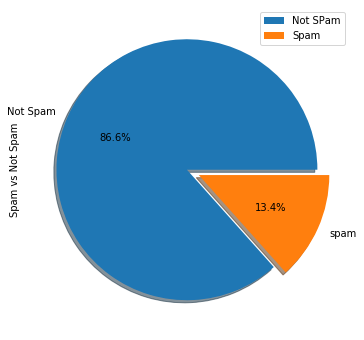

In [18]:
dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Not Spam")
plt.legend(["Not SPam", "Spam"])
plt.show()

In [25]:
porter_stemmer = PorterStemmer()
corpus =[]
for i in range(0,len(dataset)):
    newdataset = re.sub('[^a-zA-Z]', ' ' ,dataset['texts'][i])
    newdataset = newdataset.lower()
    newdataset = newdataset.split()
    
    newdataset = [porter_stemmer.stem(word) for word in newdataset if not word in stopwords.words('english')] 
    newdataset =' '.join(newdataset)
    corpus.append(newdataset)
    

In [30]:
#corpus

In [35]:
vectorizer = TfidfVectorizer()

In [38]:
X=vectorizer.fit_transform(corpus)


In [39]:
y=pd.get_dummies(dataset["label"])
y=y.iloc[:,1].values

In [40]:
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size =0.20 ,random_state=0)

In [41]:
spam_detection_model = MultinomialNB().fit(X_train , y_train)

In [44]:

y_pred = spam_detection_model.predict(X_test)

In [45]:
c_matrix = confusion_matrix(y_test,y_pred)

In [46]:
c_matrix

array([[955,   0],
       [ 34, 126]], dtype=int64)

In [47]:
accuracy = accuracy_score(y_test , y_pred)

In [48]:
accuracy

0.9695067264573991